# Graphing Video Game Sales

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('top100videogamesales.csv')

sns.set_theme(context='notebook', 
              style='darkgrid', 
              palette='mako', 
              font_scale=1)

<style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }
    small {
      font-size: 10px;
    }
    h3 {
      margin-bottom: 5px;
    }
    p {
      font-size: 14px;
    }
</style>

<small>Global Sales - Meets 1/1</small>
### A line chart shows the total global sales for each year.

**2006** was a good year to be a game publisher.💵🤑💰

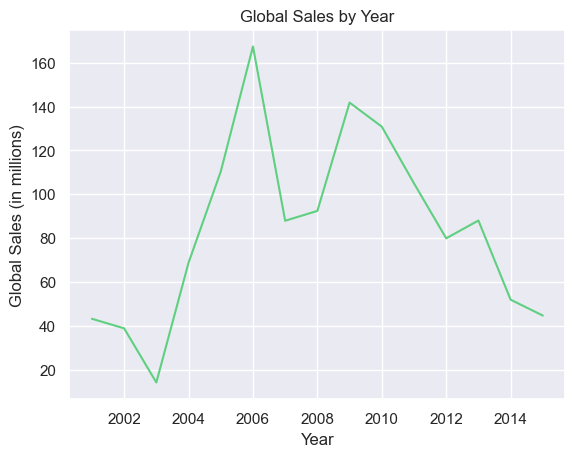

In [5]:
df_year = df.groupby('Year').sum().sort_values('Year')
sns.lineplot(data=df_year, x=df_year.index, y='Global_Sales', color='#5fcf80')
plt.title('Global Sales by Year')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.show()


<style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }
    small {
      font-size: 10px;
    }
    h3 {
      margin-bottom: 5px;
    }
    p {
      font-size: 14px;
    }
</style>

<small>Global Sales - Exceeds 1/2</small>
### What percentage of global sales does PlayStation have in the dataset?
27.1%

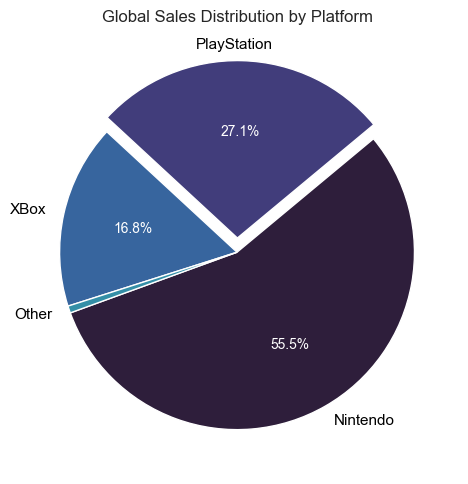

In [6]:
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(
    ascending=False)
explode_values = [
    0.08 if 'PlayStation' in 
    platform else 0 for platform in platform_sales.index]
plt.figure(figsize=(5, 5))
wedges, texts, autotexts = plt.pie(platform_sales, 
                                   labels=platform_sales.index,
                                   autopct='%1.1f%%',
                                   startangle=200,
                                   explode=explode_values, 
                                   textprops=dict(color="black"))
for autotext in autotexts:
    autotext.set(size=10, color="white")

texts[1].set_position((-0.23, 1.17))
autotexts[-1].set_visible(False)
plt.title('Global Sales Distribution by Platform')
plt.tight_layout()
plt.show()


<style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }
    small {
      font-size: 10px;
    }
    h3 {
      margin-bottom: 5px;
    }
    p {
      font-size: 14px;
    }
</style>

<small>Global Sales - Exceeds 2/2</small>
### A stacked column (or bar) chart shows the sales by region for each publisher in the data. 

Nintendo has the highest sales in all regions, with particularly strong sales in North America (NA), Europe (EU), and Japan (JP). Activision and Take-Two Interactive have significant sales in NA and EU, but relatively lower sales in JP. Electronic Arts has balanced sales between NA and EU, while Microsoft Game Studios sees a dominant portion of its sales from NA.

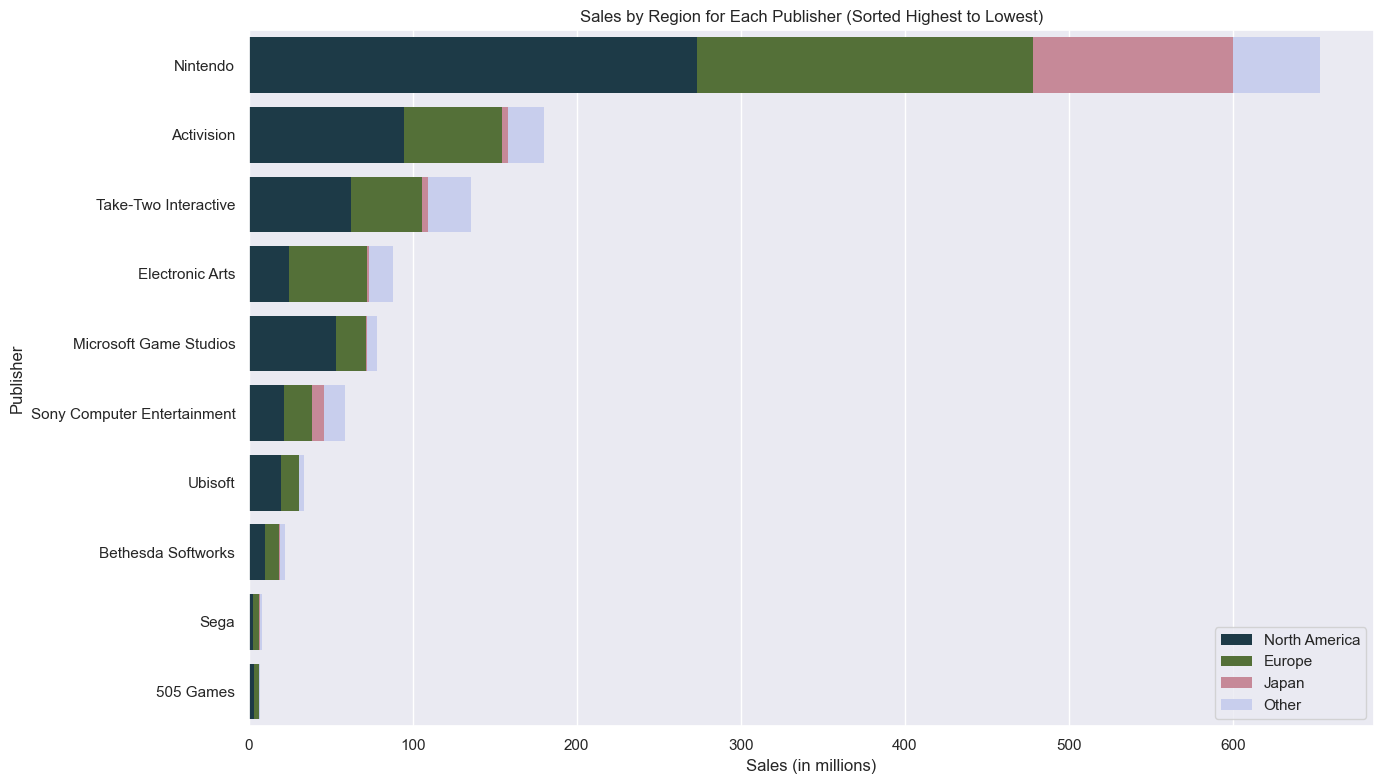

In [7]:
grouped_data = df.groupby('Publisher').agg({
    'NA_Sales': 'sum',
    'EU_Sales': 'sum',
    'JP_Sales': 'sum',
    'Other_Sales': 'sum'
}).reset_index()

country_mapping = {
    'NA_Sales': 'North America',
    'EU_Sales': 'Europe',
    'JP_Sales': 'Japan',
    'Other_Sales': 'Other'
}

regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
colors_palette = sns.color_palette("cubehelix_r", len(regions))
colors_palette.reverse()

grouped_data['Global_Sales'] = grouped_data[
    ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)
grouped_data_sorted = grouped_data.sort_values(by='Global_Sales', 
                                               ascending=False)

left_value = 0
plt.figure(figsize=(14, 8))
for region, color in zip(regions, colors_palette):
    full_name = country_mapping[region]
    ax = sns.barplot(y='Publisher', x=region, data=grouped_data_sorted, 
                     label=full_name, color=color, left=left_value, orient='h')
    plt.setp(ax.patches, linewidth=0)
    left_value += grouped_data_sorted[region]

plt.title('Sales by Region for Each Publisher (Sorted Highest to Lowest)')
plt.ylabel('Publisher')
plt.xlabel('Sales (in millions)')
plt.legend(loc='lower right')

plt.tight_layout()

plt.show()


<style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }
    small {
      font-size: 10px;
    }
    h3 {
      margin-bottom: 5px;
    }
    p {
      font-size: 14px;
    }
</style>

<small>Games Distribution - Meets 1/1</small>
### A histogram shows the global sales distribution for games with **Action** as the genre.

The majority of **action** games have global sales below 10 million units. A few standout titles in the action genre surpass the 10 million units mark, with the highest-reaching 21.4 million units.
<br>
<br>
<small>Games Distribution - Exceeds 1/1</small>
### What is the distribution of sales for **Shooter** games?

Most **shooter** games have global sales below 10 million units. A few standout titles in the shooter genre surpass the 10 million units mark, with the highest-reaching 14.76 million units.

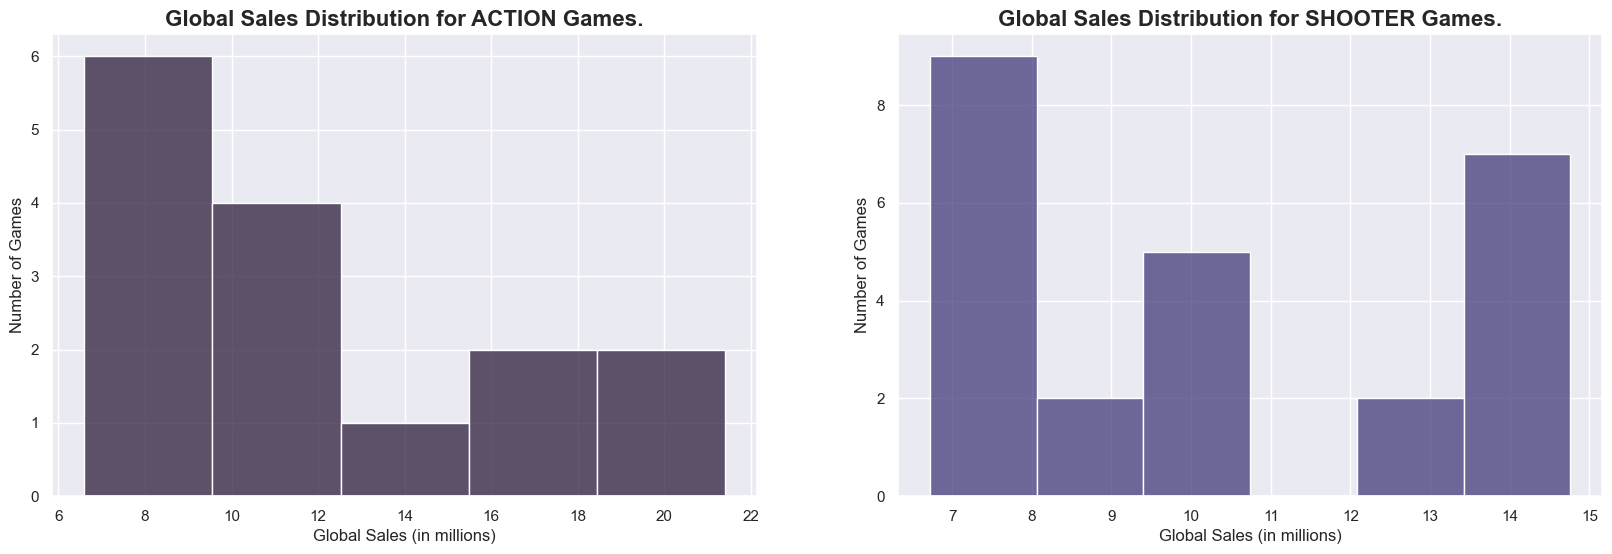

In [8]:
genres = ['Action', 'Shooter']
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
for index, (ax, genre) in enumerate(zip(axes, genres)):
    subset = df[df['Genre'] == genre]
    sns.histplot(subset['Global_Sales'], bins='auto', ax=ax, 
                 color=sns.color_palette("mako")[index])
    ax.set_title(f'Global Sales Distribution for {genre.upper()} Games.', 
                 fontsize=16,
                 fontweight='bold')
    ax.set(xlabel='Global Sales (in millions)', ylabel='Number of Games')

plt.show()

<style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }
    small {
      font-size: 10px;
    }
    h4 {
      margin-bottom: 14px;
    }
    p {
      font-size: 14px;
    }
</style>

<small>Sales by Genre - Meets 1/2</small>
#### A pie chart shows the percentage of sales each genre had in the **North American** market. Genres with 6% or less of the market are appended to the "Misc" category.

Simulation, Puzzle, and Fighting games were appended to the Misc category. The **North American's** love gun violence.

<br>
<br>
<small>Sales by Genre - Meets 2/2</small>

#### A pie chart shows the percentage of sales each genre had in the **European** market. Genres with 6% or less of the market are appended to the "Misc" category.

Simulation, Puzzle, and Fighting games were appended to the Misc category. The **European's** love sports.

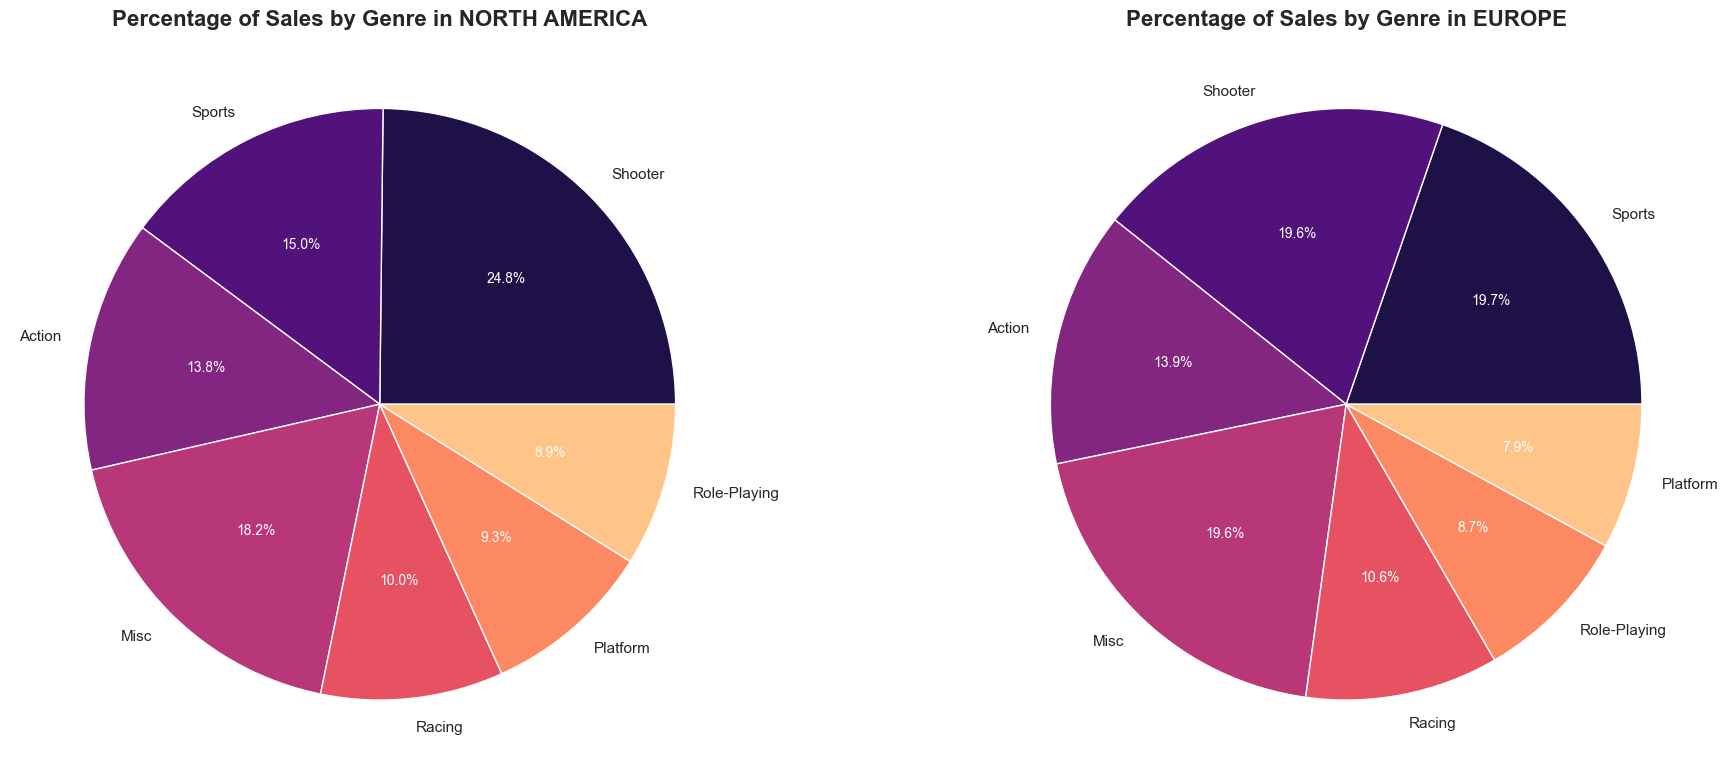

In [11]:
def consolidate_small_genres(data, region):
    genre_sales = data.groupby('Genre')[region]
    genre_sales = genre_sales.sum().sort_values(ascending=False)
    threshold = 0.06 * genre_sales.sum()
    small_genres = genre_sales[genre_sales < threshold]
    genre_sales = genre_sales[genre_sales >= threshold]
    genre_sales['Misc'] += small_genres.sum()
    return genre_sales

def plot_pie_chart(ax, genre_sales, title):
    colors = sns.color_palette("magma", n_colors=len(genre_sales))
    wedges, texts, autotexts = ax.pie(genre_sales,
                                      labels=genre_sales.index, 
                                      autopct='%1.1f%%',
                                      colors=colors)
    ax.set_title(f'Percentage of Sales by Genre in {title.upper()}',
                 fontsize='16',
                 fontweight='bold')
    for autotext in autotexts:
        autotext.set(size=10, color="white")

regions_and_titles = [
    ('NA_Sales', 'North America'),
    ('EU_Sales', 'Europe')
]

fig, ax = plt.subplots(1, 2, figsize=(20, 8))

for axis, (region, title) in zip(ax, regions_and_titles):
    sales = consolidate_small_genres(df, region)
    plot_pie_chart(axis, sales, title)

plt.tight_layout()
plt.show()

<style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }
    small {
      font-size: 10px;
    }
    h3 {
      margin-bottom: 5px;
    }
    p {
      font-size: 14px;
    }
</style>

<small>Games - Meets 1/1</small>
### A bar (or column) chart to show the total number of games created for each platform in the dataset. 

Nintendo continues their reign of dominance.

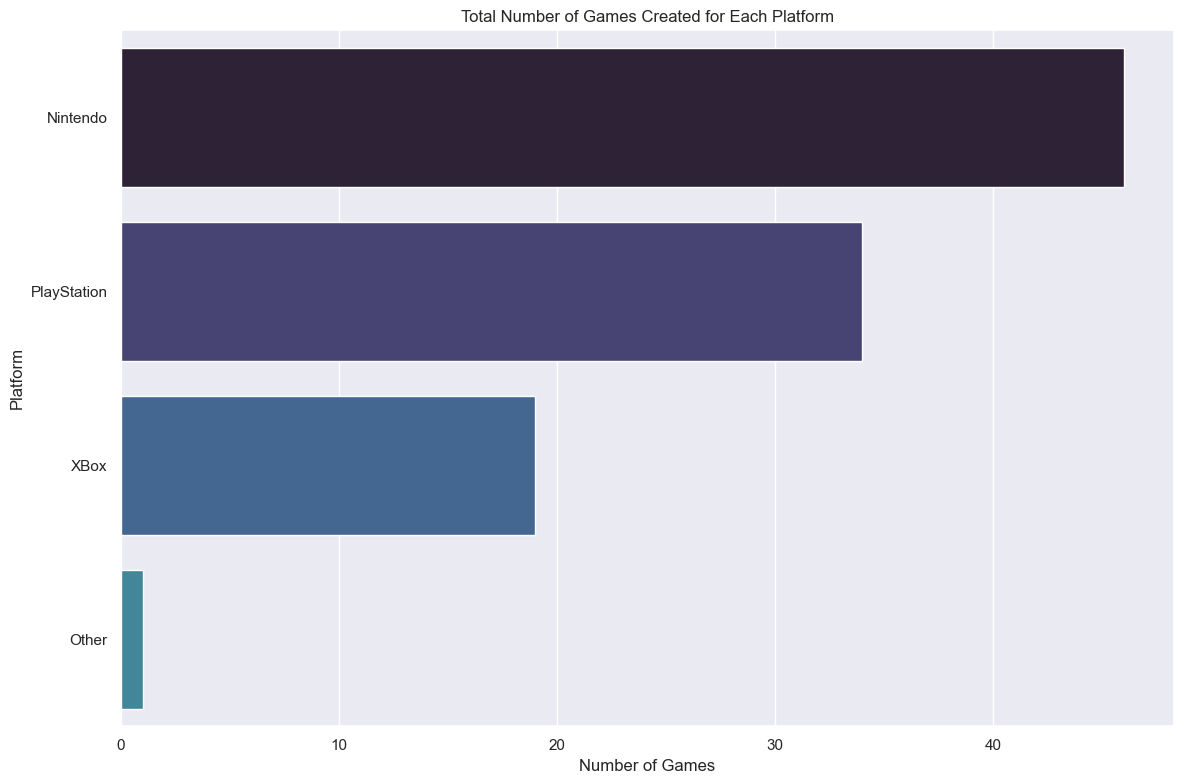

In [12]:
platform_counts = df['Platform'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=platform_counts.values, y=platform_counts.index)
plt.xlabel('Number of Games')
plt.ylabel('Platform')
plt.title('Total Number of Games Created for Each Platform')
plt.tight_layout()
plt.show()

<style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }
    small {
      font-size: 10px;
    }
    h3 {
      margin-bottom: 5px;
    }
    p {
      font-size: 14px;
    }
</style>

<small>Games - Exceeds 1/1</small>

### What genre of game is present the most in the top 100 games from 2000-2015?

Shooter

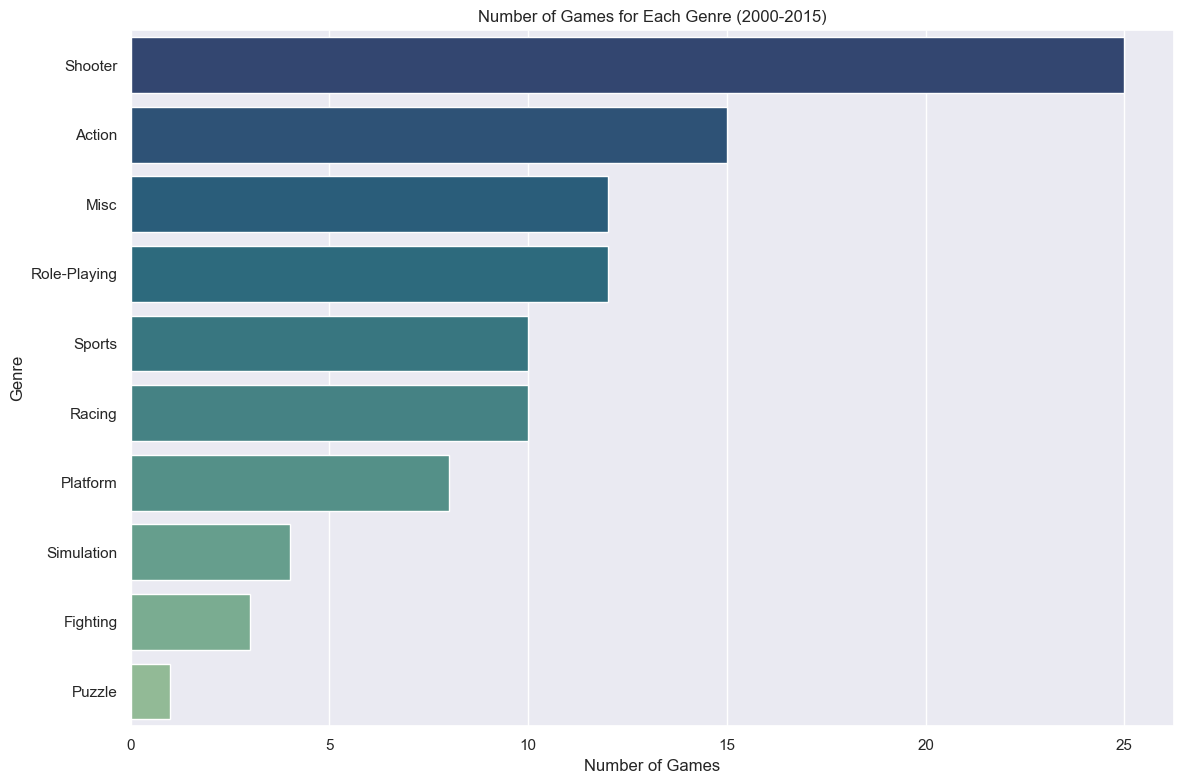

In [16]:
filtered_df = df[(df['Year'] >= 2000) & (df['Year'] <= 2015)]

genre_counts = filtered_df['Genre'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="crest_r")
plt.xlabel('Number of Games')
plt.ylabel('Genre')
plt.title('Number of Games for Each Genre (2000-2015)')
plt.tight_layout()
plt.show()